<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>
<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">آموزش یک شبکه عصبی کانولوشنالی از ابتدا</div></center></h1>

In [1]:
import keras


Using TensorFlow backend.


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">آموزش یک شبکه عصبی کانولوشنالی از ابتدا</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
کدها  برگرفته از فصل دو کتاب
</div>

[Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff)
<div style="direction:rtl;text-align:right;font-family:Tahoma">
و گیت هاب نویسنده کتاب و توسعه دهنده کراس 
</div>

[François Chollet](http://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb)
<div style="direction:rtl;text-align:right;font-family:Tahoma">
است.
</div>


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مجموعه داده</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
مجموعه داده گربه در مقابل سگ برای این مثال استفاده شده است. این مجموعه داده در چالش بینایی کامپیوتر اواخر سال ۲۰۱۳ توسط سایت Kaggle.com در دسترس عموم قرار گرفت.
<br>
از قبل از سال ۲۰۱۳ استفاده از شبکه های کانولوشنالی خیلی رایج نبود.
مجموعه داده در آدرس زیر قابل دانلود است.
</div>

`https://www.kaggle.com/c/dogs-vs-cats/data`



![cats_vs_dogs_samples](https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)

Unsurprisingly, the cats vs. dogs Kaggle competition in 2013 was won by entrants who used convnets. The best entries could achieve up to 
95% accuracy. In our own example, we will get fairly close to this accuracy (in the next section), even though we will be training our 
models on less than 10% of the data that was available to the competitors.
This original dataset contains 25,000 images of dogs and cats (12,500 from each class) and is 543MB large (compressed). After downloading 
and uncompressing it, we will create a new dataset containing three subsets: a training set with 1000 samples of each class, a validation 
set with 500 samples of each class, and finally a test set with 500 samples of each class.

Here are a few lines of code to do this:

In [2]:
import os, shutil

In [3]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'D:/dataset/catDog/train'

# The directory where we will
# store our smaller dataset
base_dir = 'D:/dataset/catDog/catVsdog'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> برای بررسی صحت انجام کار تعداد تصاویرآموزشی/آزمون/توسعه را بررسی میکنیم.</div>


In [4]:
train_cats_dir

'D:/dataset/catDog/catVsdog\\train\\cats'

In [5]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [6]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [7]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [8]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [9]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [10]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


<div style="direction:rtl;text-align:right;font-family:Tahoma">
با توجه به اینکه تعداد تصاویر یکسانی از سگ و گربه برداشته ایم معیار Accuracy معیارمناسبی برای ارزیابی خواهد بود.
</div>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تعریف معماری مدل (model architecture)</div>

Since we are attacking a binary classification problem, we are ending the network with a single unit (a `Dense` layer of size 1) and a 
`sigmoid` activation. This unit will encode the probability that the network is looking at one class or the other.

In [13]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Let's take a look at how the dimensions of the feature maps change with every successive layer:

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

For our compilation step, we'll go with the `RMSprop` optimizer as usual. Since we ended our network with a single sigmoid unit, we will 
use binary crossentropy as our loss (as a reminder, check out the table in Chapter 4, section 5 for a cheatsheet on what loss function to 
use in various situations).

In [15]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">  پیش پردازش داده (Data preprocessing)</div>

* Read the picture files.
* Decode the JPEG content to RGB grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

It may seem a bit daunting, but thankfully Keras has utilities to take care of these steps automatically. Keras has a module with image 
processing helper tools, located at `keras.preprocessing.image`. In particular, it contains the class `ImageDataGenerator` which allows to 
quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors. This is what we 
will use here.

<div style="direction:rtl;text-align:right;font-family:Tahoma">
    اطلاعات بیشتر در مستندات Keras :
</div>

`https://keras.io/preprocessing/image/`

In [16]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let's take a look at the output of one of these generators: it yields batches of 150x150 RGB images (shape `(20, 150, 150, 3)`) and binary 
labels (shape `(20,)`). 20 is the number of samples in each batch (the batch size). Note that the generator yields these batches 
indefinitely: it just loops endlessly over the images present in the target folder. For this reason, we need to `break` the iteration loop 
at some point.

In [17]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Let's fit our model to the data using the generator. We do it using the `fit_generator` method, the equivalent of `fit` for data generators 
like ours. It expects as first argument a Python generator that will yield batches of inputs and targets indefinitely, like ours does. 
Because the data is being generated endlessly, the generator needs to know example how many samples to draw from the generator before 
declaring an epoch over. This is the role of the `steps_per_epoch` argument: after having drawn `steps_per_epoch` batches from the 
generator, i.e. after having run for `steps_per_epoch` gradient descent steps, the fitting process will go to the next epoch. In our case, 
batches are 20-sample large, so it will take 100 batches until we see our target of 2000 samples.

When using `fit_generator`, one may pass a `validation_data` argument, much like with the `fit` method. Importantly, this argument is 
allowed to be a data generator itself, but it could be a tuple of Numpy arrays as well. If you pass a generator as `validation_data`, then 
this generator is expected to yield batches of validation data endlessly, and thus you should also specify the `validation_steps` argument, 
which tells the process how many batches to draw from the validation generator for evaluation.

In [15]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 16s 163ms/step - loss: 0.6893 - acc: 0.5310 - val_loss: 0.6687 - val_acc: 0.6220
Epoch 2/30
100/100 [==============================] - 12s 121ms/step - loss: 0.6580 - acc: 0.6045 - val_loss: 0.6300 - val_acc: 0.6510
Epoch 3/30
100/100 [==============================] - 12s 121ms/step - loss: 0.6024 - acc: 0.6740 - val_loss: 0.5989 - val_acc: 0.6770
Epoch 4/30
100/100 [==============================] - 12s 121ms/step - loss: 0.5647 - acc: 0.7050 - val_loss: 0.5879 - val_acc: 0.6730
Epoch 5/30
100/100 [==============================] - 12s 121ms/step - loss: 0.5325 - acc: 0.7360 - val_loss: 0.5854 - val_acc: 0.6780
Epoch 6/30
100/100 [==============================] - 12s 122ms/step - loss: 0.5045 - acc: 0.7460 - val_loss: 0.5794 - val_acc: 0.6830
Epoch 7/30
100/100 [==============================] - 12s 122ms/step - loss: 0.4919 - acc: 0.7620 - val_loss: 0.5656 - val_acc: 0.6930
Epoch 8/30
100/100 [==============================] - 1

Let's plot the loss and accuracy of the model over the training and validation data during training:

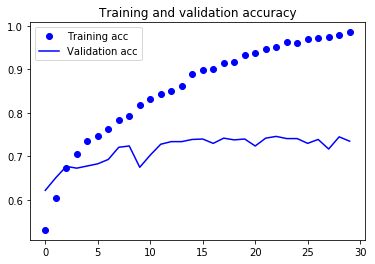

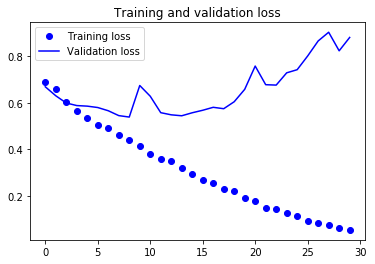

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

These plots are characteristic of overfitting. Our training accuracy increases linearly over time, until it reaches nearly 100%, while our 
validation accuracy stalls at 70-72%. Our validation loss reaches its minimum after only five epochs then stalls, while the training loss 
keeps decreasing linearly until it reaches nearly 0.

Because we only have relatively few training samples (2000), overfitting is going to be our number one concern.
Let's train our network using data augmentation and dropout:

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">شبکه با Dropout</div>

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 14s 140ms/step - loss: 0.6915 - acc: 0.5220 - val_loss: 0.6812 - val_acc: 0.5070
Epoch 2/100
100/100 [==============================] - 13s 128ms/step - loss: 0.6726 - acc: 0.5910 - val_loss: 0.6958 - val_acc: 0.5490
Epoch 3/100
100/100 [==============================] - 13s 127ms/step - loss: 0.6395 - acc: 0.6325 - val_loss: 0.6757 - val_acc: 0.5740
Epoch 4/100
100/100 [==============================] - 13s 127ms/step - loss: 0.5973 - acc: 0.6840 - val_loss: 0.6083 - val_acc: 0.6690
Epoch 5/100
100/100 [==============================] - 13s 128ms/step - loss: 0.5563 - acc: 0.7150 - val_loss: 0.5897 - val_acc: 0.6700
Epoch 6/100
100/100 [==============================] - 13s 128ms/step - loss: 0.5454 - acc: 0.7250 - val_loss: 0.5867 - val_acc: 0.6700
Epoch 7/100
100/100 [==============================] - 13s 128ms/step - loss: 0.5314 - acc: 0.7325 - val_loss: 0.6768 - val_acc: 0.6480
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 12s 124ms/step - loss: 0.0446 - acc: 0.9855 - val_loss: 0.9633 - val_acc: 0.7660
Epoch 62/100
100/100 [==============================] - 12s 124ms/step - loss: 0.0351 - acc: 0.9905 - val_loss: 1.0186 - val_acc: 0.7610
Epoch 63/100
100/100 [==============================] - 12s 124ms/step - loss: 0.0574 - acc: 0.9775 - val_loss: 0.9036 - val_acc: 0.7680
Epoch 64/100
100/100 [==============================] - 12s 123ms/step - loss: 0.0357 - acc: 0.9875 - val_loss: 1.0182 - val_acc: 0.7650
Epoch 65/100
100/100 [==============================] - 12s 124ms/step - loss: 0.0403 - acc: 0.9865 - val_loss: 1.1160 - val_acc: 0.7610
Epoch 66/100
100/100 [==============================] - 12s 123ms/step - loss: 0.0414 - acc: 0.9865 - val_loss: 1.0252 - val_acc: 0.7580
Epoch 67/100
100/100 [==============================] - 12s 124ms/step - loss: 0.0317 - acc: 0.9890 - val_loss: 1.0357 - val_acc: 0.7750
Epoch 68/100
100/100 [===================

Let's plot our results again:

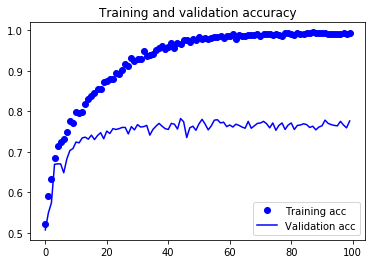

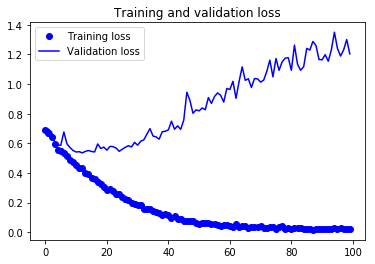

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ذخیره کردن مدل</div>


In [19]:
model.save('cats_and_dogs_small_1.h5')

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> دوره مقدماتی یادگیری عمیق<br>علیرضا اخوان پور<br>پنج شنبه، ۲۵ بهمن ۱۳۹۷<br>
</div>
<a href="http://class.vision">Class.Vision</a> - <a href="http://AkhavanPour.ir">AkhavanPour.ir</a> - <a href="https://github.com/Alireza-Akhavan/">GitHub</a>

</div>